# Requirements

In [1]:
import pandas as pd

In [2]:
# Add as many imports as you need.
import pandas as pd

from VNP.packages.data_alalysis import *
from VNP.packages.data_preperation import *
from VNP.packages.missing_values import *
from VNP.packages.visualization import *
from VNP.packages.models import *
from VNP.packages.evaluation import *
from VNP.packages.vnp_ez import *
%load_ext autoreload
%autoreload 2


## Introduction
In this laboratory assignment, the focus is on time series forecasting, specifically targeting the prediction of the current **close price** for the Amazon stock. To accomplish this, you will use data from the preceding 7 days, and past statistics. 


## The Amazon Stock Price Dataset

The dataset comprises the following columns:
- date - the date of the recorded price
- open - the open price of the stock
- high - the high price of the stock
- low - the low price of the stock
- volume - the volume trades
- close - the close price of the stock

Target:
close

Load the dataset into a `pandas` data frame.

In [3]:
# Write your code here. Add as many boxes as you need.

df = pd.read_csv('../data/amazon_stock_price.csv')

In [4]:
df

,date,open,high,low,close,volume
0,1997-05-15,0.1219,0.1250,0.0964,0.0979,1443120000
1,1997-05-16,0.0984,0.0990,0.0854,0.0865,294000000
2,1997-05-19,0.0880,0.0885,0.0812,0.0854,122136000
3,1997-05-20,0.0865,0.0875,0.0818,0.0818,109344000
4,1997-05-21,0.0818,0.0823,0.0688,0.0714,377064000
...,...,...,...,...,...,...
6680,2023-11-30,144.7600,146.9300,144.3300,146.0900,65814000
6681,2023-12-01,146.0000,147.2500,145.5500,147.0300,39924600
6682,2023-12-04,145.2500,145.3500,142.8100,144.8400,48294200
6683,2023-12-05,143.5500,148.5700,143.1300,146.8800,46822400


Explore the dataset using visualizations of your choice.

In [5]:
# Write your code here. Add as many boxes as you need.
missing_table(df)

,Feature,CountMissing,PercentageMissing,Total
0,date,0,0.0,6685
1,open,0,0.0,6685
2,high,0,0.0,6685
3,low,0,0.0,6685
4,close,0,0.0,6685
5,volume,0,0.0,6685


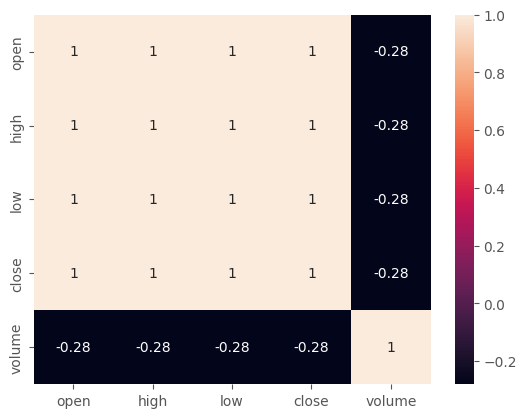

In [6]:
correlation_map(df)

In [7]:
df_1 = to_time_series(df, time_feature="date",auto_sort=True)

In [8]:
df_2 = fill_data(df_1)

In [9]:
df_2

,open,high,low,close,volume
1997-05-15,0.1219,0.1250,0.0964,0.0979,1.443120e+09
1997-05-16,0.0984,0.0990,0.0854,0.0865,2.940000e+08
1997-05-17,NaN,NaN,NaN,NaN,NaN
1997-05-18,NaN,NaN,NaN,NaN,NaN
1997-05-19,0.0880,0.0885,0.0812,0.0854,1.221360e+08
...,...,...,...,...,...
2023-12-02,NaN,NaN,NaN,NaN,NaN
2023-12-03,NaN,NaN,NaN,NaN,NaN
2023-12-04,145.2500,145.3500,142.8100,144.8400,4.829420e+07
2023-12-05,143.5500,148.5700,143.1300,146.8800,4.682240e+07


In [10]:
def interpolation(data:pd.DataFrame, features, method='linear'):
    data_copy = data.copy()
    for feature in features:
        data_copy[feature] = data_copy[feature].interpolate(method=method)
    return data_copy

In [11]:
df_3 = interpolation(df_2, df_2.columns)

In [12]:
df_3

,open,high,low,close,volume
1997-05-15,0.121900,0.125000,0.096400,0.097900,1.443120e+09
1997-05-16,0.098400,0.099000,0.085400,0.086500,2.940000e+08
1997-05-17,0.094933,0.095500,0.084000,0.086133,2.367120e+08
1997-05-18,0.091467,0.092000,0.082600,0.085767,1.794240e+08
1997-05-19,0.088000,0.088500,0.081200,0.085400,1.221360e+08
...,...,...,...,...,...
2023-12-02,145.750000,146.616667,144.636667,146.300000,4.271447e+07
2023-12-03,145.500000,145.983333,143.723333,145.570000,4.550433e+07
2023-12-04,145.250000,145.350000,142.810000,144.840000,4.829420e+07
2023-12-05,143.550000,148.570000,143.130000,146.880000,4.682240e+07


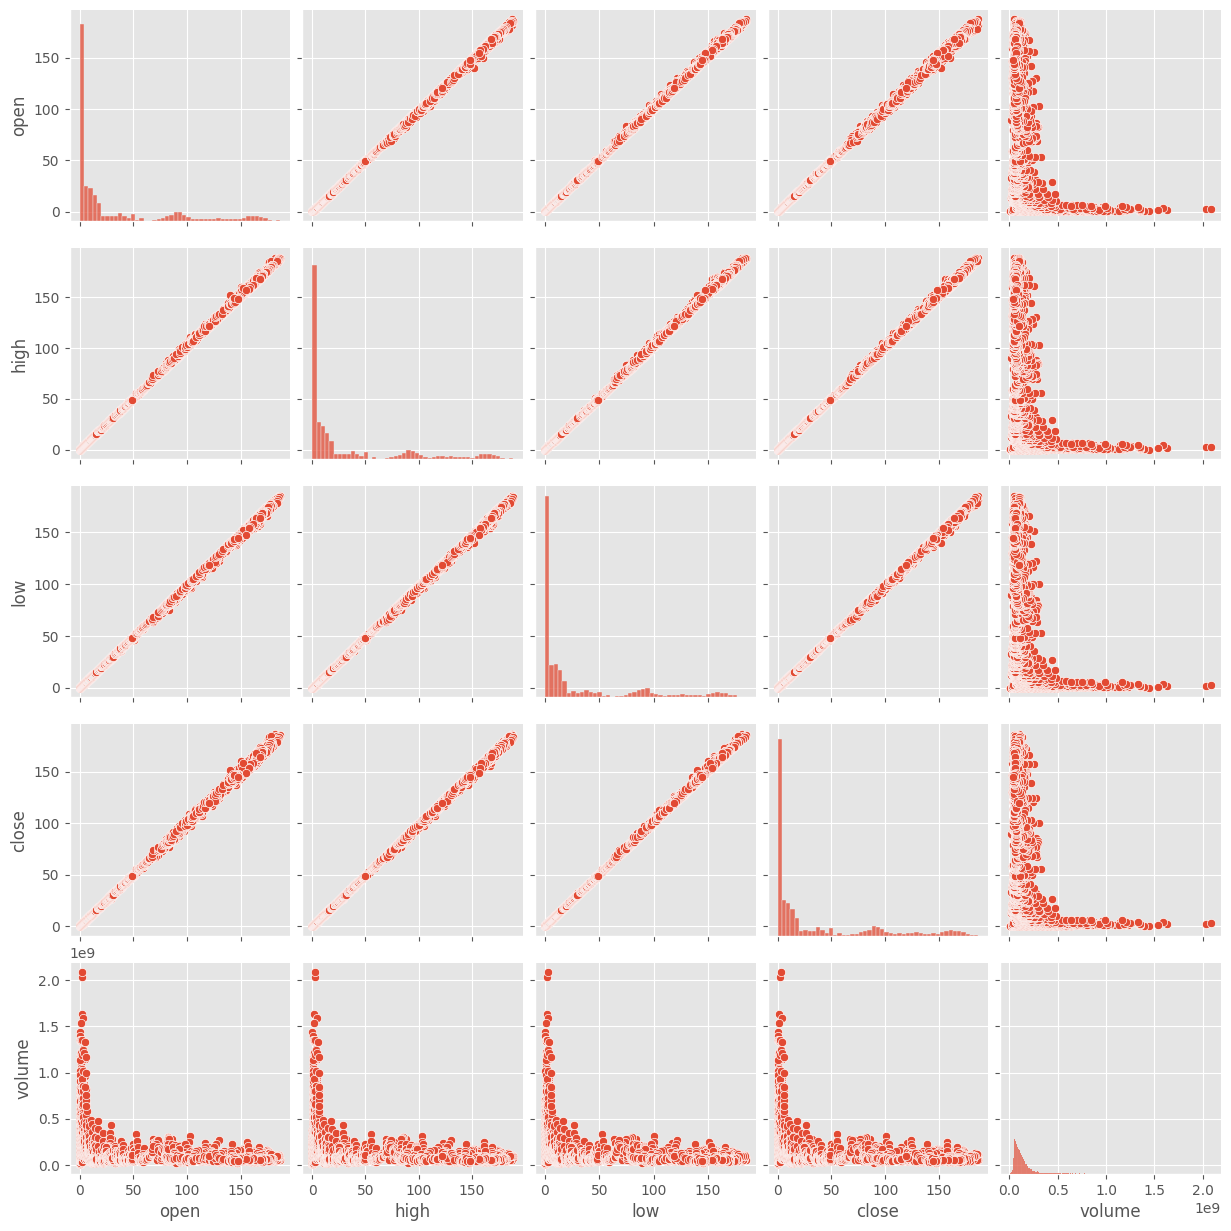

In [13]:
sns.pairplot(df_3)

# Feauture Extraction
Select the relevant features for prediction and apply a lag of up to 7 days to each chosen feature

Hint: Use `df['column_name'].shift(period)`. Check the documentation at https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html.

In [14]:
features_to_shift = ["close", "volume"]

In [15]:
# Write your code here. Add as many boxes as you need.
df_4, features_1 =  auto_shift(df_3,lag=7,features_to_shift= features_to_shift,auto_drop_na=True )

In [16]:
df_5 =  df_4.drop(columns=["open", "high", "low", "volume"])

In [17]:
df_5

,close,close_prev_7,close_prev_6,close_prev_5,close_prev_4,close_prev_3,close_prev_2,close_prev_1,volume_prev_7,volume_prev_6,volume_prev_5,volume_prev_4,volume_prev_3,volume_prev_2,volume_prev_1
1997-05-22,0.06980,0.097900,0.086500,0.086133,0.085767,0.0854,0.08180,0.07140,1.443120e+09,2.940000e+08,236712000.0,1.794240e+08,1.221360e+08,1.093440e+08,3.770640e+08
1997-05-23,0.07500,0.086500,0.086133,0.085767,0.085400,0.0818,0.07140,0.06980,2.940000e+08,2.367120e+08,179424000.0,1.221360e+08,1.093440e+08,3.770640e+08,2.355360e+08
1997-05-24,0.07605,0.086133,0.085767,0.085400,0.081800,0.0714,0.06980,0.07500,2.367120e+08,1.794240e+08,122136000.0,1.093440e+08,3.770640e+08,2.355360e+08,3.187440e+08
1997-05-25,0.07710,0.085767,0.085400,0.081800,0.071400,0.0698,0.07500,0.07605,1.794240e+08,1.221360e+08,109344000.0,3.770640e+08,2.355360e+08,3.187440e+08,2.825460e+08
1997-05-26,0.07815,0.085400,0.081800,0.071400,0.069800,0.0750,0.07605,0.07710,1.221360e+08,1.093440e+08,377064000.0,2.355360e+08,3.187440e+08,2.825460e+08,2.463480e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-02,146.30000,147.070000,147.400000,147.730000,147.030000,146.3200,146.09000,147.03000,3.283973e+07,4.330107e+07,53762400.0,4.271170e+07,4.061090e+07,6.581400e+07,3.992460e+07
2023-12-03,145.57000,147.400000,147.730000,147.030000,146.320000,146.0900,147.03000,146.30000,4.330107e+07,5.376240e+07,42711700.0,4.061090e+07,6.581400e+07,3.992460e+07,4.271447e+07
2023-12-04,144.84000,147.730000,147.030000,146.320000,146.090000,147.0300,146.30000,145.57000,5.376240e+07,4.271170e+07,40610900.0,6.581400e+07,3.992460e+07,4.271447e+07,4.550433e+07
2023-12-05,146.88000,147.030000,146.320000,146.090000,147.030000,146.3000,145.57000,144.84000,4.271170e+07,4.061090e+07,65814000.0,3.992460e+07,4.271447e+07,4.550433e+07,4.829420e+07


## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

**WARNING: DO NOT SHUFFLE THE DATASET.**



In [18]:
# Write your code here. Add as many boxes as you need.

In [19]:
X,Y = get_x_and_y(df_5, "close")

In [20]:
X

,close_prev_7,close_prev_6,close_prev_5,close_prev_4,close_prev_3,close_prev_2,close_prev_1,volume_prev_7,volume_prev_6,volume_prev_5,volume_prev_4,volume_prev_3,volume_prev_2,volume_prev_1
1997-05-22,0.097900,0.086500,0.086133,0.085767,0.0854,0.08180,0.07140,1.443120e+09,2.940000e+08,236712000.0,1.794240e+08,1.221360e+08,1.093440e+08,3.770640e+08
1997-05-23,0.086500,0.086133,0.085767,0.085400,0.0818,0.07140,0.06980,2.940000e+08,2.367120e+08,179424000.0,1.221360e+08,1.093440e+08,3.770640e+08,2.355360e+08
1997-05-24,0.086133,0.085767,0.085400,0.081800,0.0714,0.06980,0.07500,2.367120e+08,1.794240e+08,122136000.0,1.093440e+08,3.770640e+08,2.355360e+08,3.187440e+08
1997-05-25,0.085767,0.085400,0.081800,0.071400,0.0698,0.07500,0.07605,1.794240e+08,1.221360e+08,109344000.0,3.770640e+08,2.355360e+08,3.187440e+08,2.825460e+08
1997-05-26,0.085400,0.081800,0.071400,0.069800,0.0750,0.07605,0.07710,1.221360e+08,1.093440e+08,377064000.0,2.355360e+08,3.187440e+08,2.825460e+08,2.463480e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-02,147.070000,147.400000,147.730000,147.030000,146.3200,146.09000,147.03000,3.283973e+07,4.330107e+07,53762400.0,4.271170e+07,4.061090e+07,6.581400e+07,3.992460e+07
2023-12-03,147.400000,147.730000,147.030000,146.320000,146.0900,147.03000,146.30000,4.330107e+07,5.376240e+07,42711700.0,4.061090e+07,6.581400e+07,3.992460e+07,4.271447e+07
2023-12-04,147.730000,147.030000,146.320000,146.090000,147.0300,146.30000,145.57000,5.376240e+07,4.271170e+07,40610900.0,6.581400e+07,3.992460e+07,4.271447e+07,4.550433e+07
2023-12-05,147.030000,146.320000,146.090000,147.030000,146.3000,145.57000,144.84000,4.271170e+07,4.061090e+07,65814000.0,3.992460e+07,4.271447e+07,4.550433e+07,4.829420e+07


In [21]:
Y

1997-05-22      0.06980
1997-05-23      0.07500
1997-05-24      0.07605
1997-05-25      0.07710
1997-05-26      0.07815
                ...    
2023-12-02    146.30000
2023-12-03    145.57000
2023-12-04    144.84000
2023-12-05    146.88000
2023-12-06    144.52000
Freq: D, Name: close, Length: 9695, dtype: float64

In [22]:
x_train,x_test,y_train,y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)

In [23]:
x_train

,close_prev_7,close_prev_6,close_prev_5,close_prev_4,close_prev_3,close_prev_2,close_prev_1,volume_prev_7,volume_prev_6,volume_prev_5,volume_prev_4,volume_prev_3,volume_prev_2,volume_prev_1
1997-05-22,0.097900,0.086500,0.086133,0.085767,0.0854,0.08180,0.07140,1.443120e+09,294000000.0,236712000.0,1.794240e+08,1.221360e+08,1.093440e+08,3.770640e+08
1997-05-23,0.086500,0.086133,0.085767,0.085400,0.0818,0.07140,0.06980,2.940000e+08,236712000.0,179424000.0,1.221360e+08,1.093440e+08,3.770640e+08,2.355360e+08
1997-05-24,0.086133,0.085767,0.085400,0.081800,0.0714,0.06980,0.07500,2.367120e+08,179424000.0,122136000.0,1.093440e+08,3.770640e+08,2.355360e+08,3.187440e+08
1997-05-25,0.085767,0.085400,0.081800,0.071400,0.0698,0.07500,0.07605,1.794240e+08,122136000.0,109344000.0,3.770640e+08,2.355360e+08,3.187440e+08,2.825460e+08
1997-05-26,0.085400,0.081800,0.071400,0.069800,0.0750,0.07605,0.07710,1.221360e+08,109344000.0,377064000.0,2.355360e+08,3.187440e+08,2.825460e+08,2.463480e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-11,91.572167,91.979833,92.387500,93.124000,94.3260,94.92600,94.31500,6.875200e+07,68294000.0,67836000.0,6.755000e+07,7.926000e+07,9.720800e+07,7.279800e+07
2018-08-12,91.979833,92.387500,93.124000,94.326000,94.9260,94.31500,94.48000,6.829400e+07,67836000.0,67550000.0,7.926000e+07,9.720800e+07,7.279800e+07,8.540867e+07
2018-08-13,92.387500,93.124000,94.326000,94.926000,94.3150,94.48000,94.64500,6.783600e+07,67550000.0,79260000.0,9.720800e+07,7.279800e+07,8.540867e+07,9.801933e+07
2018-08-14,93.124000,94.326000,94.926000,94.315000,94.4800,94.64500,94.81000,6.755000e+07,79260000.0,97208000.0,7.279800e+07,8.540867e+07,9.801933e+07,1.106300e+08


In [24]:
x_test

,close_prev_7,close_prev_6,close_prev_5,close_prev_4,close_prev_3,close_prev_2,close_prev_1,volume_prev_7,volume_prev_6,volume_prev_5,volume_prev_4,volume_prev_3,volume_prev_2,volume_prev_1
2018-08-16,94.926,94.3150,94.4800,94.6450,94.8100,95.982500,94.131000,9.720800e+07,7.279800e+07,8.540867e+07,9.801933e+07,1.106300e+08,7.972200e+07,1.540140e+08
2018-08-17,94.315,94.4800,94.6450,94.8100,95.9825,94.131000,94.326000,7.279800e+07,8.540867e+07,9.801933e+07,1.106300e+08,7.972200e+07,1.540140e+08,7.914200e+07
2018-08-18,94.480,94.6450,94.8100,95.9825,94.1310,94.326000,94.111000,8.540867e+07,9.801933e+07,1.106300e+08,7.972200e+07,1.540140e+08,7.914200e+07,8.208600e+07
2018-08-19,94.645,94.8100,95.9825,94.1310,94.3260,94.111000,94.019167,9.801933e+07,1.106300e+08,7.972200e+07,1.540140e+08,7.914200e+07,8.208600e+07,7.380400e+07
2018-08-20,94.810,95.9825,94.1310,94.3260,94.1110,94.019167,93.927333,1.106300e+08,7.972200e+07,1.540140e+08,7.914200e+07,8.208600e+07,7.380400e+07,6.552200e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-02,147.070,147.4000,147.7300,147.0300,146.3200,146.090000,147.030000,3.283973e+07,4.330107e+07,5.376240e+07,4.271170e+07,4.061090e+07,6.581400e+07,3.992460e+07
2023-12-03,147.400,147.7300,147.0300,146.3200,146.0900,147.030000,146.300000,4.330107e+07,5.376240e+07,4.271170e+07,4.061090e+07,6.581400e+07,3.992460e+07,4.271447e+07
2023-12-04,147.730,147.0300,146.3200,146.0900,147.0300,146.300000,145.570000,5.376240e+07,4.271170e+07,4.061090e+07,6.581400e+07,3.992460e+07,4.271447e+07,4.550433e+07
2023-12-05,147.030,146.3200,146.0900,147.0300,146.3000,145.570000,144.840000,4.271170e+07,4.061090e+07,6.581400e+07,3.992460e+07,4.271447e+07,4.550433e+07,4.829420e+07


In [25]:
# min_max_scaler = MinMaxScaler()
# x_train_scaled = min_max_scaler.fit_transform(x_train)

In [26]:
x_test_scaled = x_test

In [27]:
# x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns, index=x_train.index)
x_train_scaled = x_train

In [28]:
x_train_scaled

,close_prev_7,close_prev_6,close_prev_5,close_prev_4,close_prev_3,close_prev_2,close_prev_1,volume_prev_7,volume_prev_6,volume_prev_5,volume_prev_4,volume_prev_3,volume_prev_2,volume_prev_1
1997-05-22,0.097900,0.086500,0.086133,0.085767,0.0854,0.08180,0.07140,1.443120e+09,294000000.0,236712000.0,1.794240e+08,1.221360e+08,1.093440e+08,3.770640e+08
1997-05-23,0.086500,0.086133,0.085767,0.085400,0.0818,0.07140,0.06980,2.940000e+08,236712000.0,179424000.0,1.221360e+08,1.093440e+08,3.770640e+08,2.355360e+08
1997-05-24,0.086133,0.085767,0.085400,0.081800,0.0714,0.06980,0.07500,2.367120e+08,179424000.0,122136000.0,1.093440e+08,3.770640e+08,2.355360e+08,3.187440e+08
1997-05-25,0.085767,0.085400,0.081800,0.071400,0.0698,0.07500,0.07605,1.794240e+08,122136000.0,109344000.0,3.770640e+08,2.355360e+08,3.187440e+08,2.825460e+08
1997-05-26,0.085400,0.081800,0.071400,0.069800,0.0750,0.07605,0.07710,1.221360e+08,109344000.0,377064000.0,2.355360e+08,3.187440e+08,2.825460e+08,2.463480e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-11,91.572167,91.979833,92.387500,93.124000,94.3260,94.92600,94.31500,6.875200e+07,68294000.0,67836000.0,6.755000e+07,7.926000e+07,9.720800e+07,7.279800e+07
2018-08-12,91.979833,92.387500,93.124000,94.326000,94.9260,94.31500,94.48000,6.829400e+07,67836000.0,67550000.0,7.926000e+07,9.720800e+07,7.279800e+07,8.540867e+07
2018-08-13,92.387500,93.124000,94.326000,94.926000,94.3150,94.48000,94.64500,6.783600e+07,67550000.0,79260000.0,9.720800e+07,7.279800e+07,8.540867e+07,9.801933e+07
2018-08-14,93.124000,94.326000,94.926000,94.315000,94.4800,94.64500,94.81000,6.755000e+07,79260000.0,97208000.0,7.279800e+07,8.540867e+07,9.801933e+07,1.106300e+08


In [29]:
x_test_scaled

,close_prev_7,close_prev_6,close_prev_5,close_prev_4,close_prev_3,close_prev_2,close_prev_1,volume_prev_7,volume_prev_6,volume_prev_5,volume_prev_4,volume_prev_3,volume_prev_2,volume_prev_1
2018-08-16,94.926,94.3150,94.4800,94.6450,94.8100,95.982500,94.131000,9.720800e+07,7.279800e+07,8.540867e+07,9.801933e+07,1.106300e+08,7.972200e+07,1.540140e+08
2018-08-17,94.315,94.4800,94.6450,94.8100,95.9825,94.131000,94.326000,7.279800e+07,8.540867e+07,9.801933e+07,1.106300e+08,7.972200e+07,1.540140e+08,7.914200e+07
2018-08-18,94.480,94.6450,94.8100,95.9825,94.1310,94.326000,94.111000,8.540867e+07,9.801933e+07,1.106300e+08,7.972200e+07,1.540140e+08,7.914200e+07,8.208600e+07
2018-08-19,94.645,94.8100,95.9825,94.1310,94.3260,94.111000,94.019167,9.801933e+07,1.106300e+08,7.972200e+07,1.540140e+08,7.914200e+07,8.208600e+07,7.380400e+07
2018-08-20,94.810,95.9825,94.1310,94.3260,94.1110,94.019167,93.927333,1.106300e+08,7.972200e+07,1.540140e+08,7.914200e+07,8.208600e+07,7.380400e+07,6.552200e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-02,147.070,147.4000,147.7300,147.0300,146.3200,146.090000,147.030000,3.283973e+07,4.330107e+07,5.376240e+07,4.271170e+07,4.061090e+07,6.581400e+07,3.992460e+07
2023-12-03,147.400,147.7300,147.0300,146.3200,146.0900,147.030000,146.300000,4.330107e+07,5.376240e+07,4.271170e+07,4.061090e+07,6.581400e+07,3.992460e+07,4.271447e+07
2023-12-04,147.730,147.0300,146.3200,146.0900,147.0300,146.300000,145.570000,5.376240e+07,4.271170e+07,4.061090e+07,6.581400e+07,3.992460e+07,4.271447e+07,4.550433e+07
2023-12-05,147.030,146.3200,146.0900,147.0300,146.3000,145.570000,144.840000,4.271170e+07,4.061090e+07,6.581400e+07,3.992460e+07,4.271447e+07,4.550433e+07,4.829420e+07


In [30]:
type(y_train)

pandas.core.series.Series

In [31]:
y_scaler = MinMaxScaler()

In [32]:
# y_train_scaled =  y_scaler.fit_transform(y_train.to_numpy().reshape(-1,1))
y_train_scaled =  y_train

In [33]:
y_train_scaled

1997-05-22     0.06980
1997-05-23     0.07500
1997-05-24     0.07605
1997-05-25     0.07710
1997-05-26     0.07815
                ...   
2018-08-11    94.48000
2018-08-12    94.64500
2018-08-13    94.81000
2018-08-14    95.98250
2018-08-15    94.13100
Freq: D, Name: close, Length: 7756, dtype: float64

## Ensemble Learning Methods

### Bagging

Create an instance of a Random Forest model and train it using the `fit` function.

In [34]:
# Write your code here. Add as many boxes as you need.
x_train 
# (sample, lag, features)

# (sample, features)

,close_prev_7,close_prev_6,close_prev_5,close_prev_4,close_prev_3,close_prev_2,close_prev_1,volume_prev_7,volume_prev_6,volume_prev_5,volume_prev_4,volume_prev_3,volume_prev_2,volume_prev_1
1997-05-22,0.097900,0.086500,0.086133,0.085767,0.0854,0.08180,0.07140,1.443120e+09,294000000.0,236712000.0,1.794240e+08,1.221360e+08,1.093440e+08,3.770640e+08
1997-05-23,0.086500,0.086133,0.085767,0.085400,0.0818,0.07140,0.06980,2.940000e+08,236712000.0,179424000.0,1.221360e+08,1.093440e+08,3.770640e+08,2.355360e+08
1997-05-24,0.086133,0.085767,0.085400,0.081800,0.0714,0.06980,0.07500,2.367120e+08,179424000.0,122136000.0,1.093440e+08,3.770640e+08,2.355360e+08,3.187440e+08
1997-05-25,0.085767,0.085400,0.081800,0.071400,0.0698,0.07500,0.07605,1.794240e+08,122136000.0,109344000.0,3.770640e+08,2.355360e+08,3.187440e+08,2.825460e+08
1997-05-26,0.085400,0.081800,0.071400,0.069800,0.0750,0.07605,0.07710,1.221360e+08,109344000.0,377064000.0,2.355360e+08,3.187440e+08,2.825460e+08,2.463480e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-11,91.572167,91.979833,92.387500,93.124000,94.3260,94.92600,94.31500,6.875200e+07,68294000.0,67836000.0,6.755000e+07,7.926000e+07,9.720800e+07,7.279800e+07
2018-08-12,91.979833,92.387500,93.124000,94.326000,94.9260,94.31500,94.48000,6.829400e+07,67836000.0,67550000.0,7.926000e+07,9.720800e+07,7.279800e+07,8.540867e+07
2018-08-13,92.387500,93.124000,94.326000,94.926000,94.3150,94.48000,94.64500,6.783600e+07,67550000.0,79260000.0,9.720800e+07,7.279800e+07,8.540867e+07,9.801933e+07
2018-08-14,93.124000,94.326000,94.926000,94.315000,94.4800,94.64500,94.81000,6.755000e+07,79260000.0,97208000.0,7.279800e+07,8.540867e+07,9.801933e+07,1.106300e+08


In [35]:
lag = 7;

In [36]:
x_train_Scaled_shaped = x_train_scaled.to_numpy().reshape((x_train_scaled.shape[0], lag, 2 ))

In [37]:
from keras.api.models import Sequential
from keras.api.layers import Input, LSTM, Dense
import keras

In [38]:
model = Sequential([
    Input((x_train_Scaled_shaped.shape[1], x_train_Scaled_shaped.shape[2],)),
    LSTM(64, activation="relu", return_sequences=True),
    LSTM(32, activation="relu"),
    Dense(1, activation="linear")
])

In [39]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 7, 64)          │        17,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,601 (115.63 KB)

 Trainable params: 29,601 (115.63 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
model.compile(
    loss=keras.losses.MeanSquaredError(),
    optimizer=keras.optimizers.Adam(),
    metrics=[keras.metrics.MeanSquaredError()],
)

In [41]:
history = model.fit(x_train_Scaled_shaped, y_train_scaled, validation_split=0.2, epochs=8, batch_size=32, shuffle=False)

Epoch 1/8
194/194 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 9635383738368.0000 - mean_squared_error: 9635383738368.0000 - val_loss: 17495015424.0000 - val_mean_squared_error: 17495015424.0000
Epoch 2/8
194/194 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 211388727296.0000 - mean_squared_error: 211388727296.0000 - val_loss: 4333470208.0000 - val_mean_squared_error: 4333470208.0000
Epoch 3/8
194/194 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 47364972544.0000 - mean_squared_error: 47364972544.0000 - val_loss: 786084288.0000 - val_mean_squared_error: 786084288.0000
Epoch 4/8
194/194 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 7645764608.0000 - mean_squared_error: 7645764608.0000 - val_loss: 376733472.0000 - val_mean_squared_error: 376733472.0000
Epoch 5/8
194/194 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 401286299648.0000 - mean_squared_error: 401286299648.0000 - val_loss: 779815744.0000 - val_mean_squared_error: 779815744.0000
Epoch 6/8
194/194 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 3945425920.000

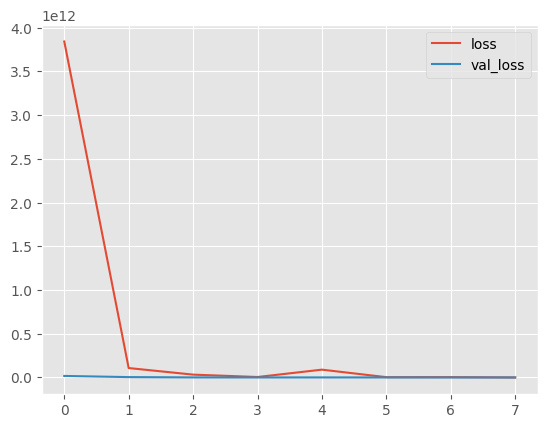

In [42]:
train_history_visualization(history)

In [43]:
x_test_scaled_shaped = reshape_for_lstm(x_test_scaled, lag)

In [44]:
x_test_scaled_shaped.shape

(1939, 7, 2)

In [45]:
pred_y = model.predict(x_test_scaled_shaped)

61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [46]:
pred_y

array([[ 366.91653],
       [1017.6851 ],
       [-550.5866 ],
       ...,
       [ 761.35443],
       [  44.11689],
       [ 411.8927 ]], dtype=float32)

In [47]:
# pred_y_scaled = y_scaler.inverse_transform(pred_y)

In [48]:
# pred_y_scaled

In [49]:
regression_report(y_test, pred_y)

Regression Report:
Mean Square Error: 283298.40438561543
R2 Score: -276.91870951231016


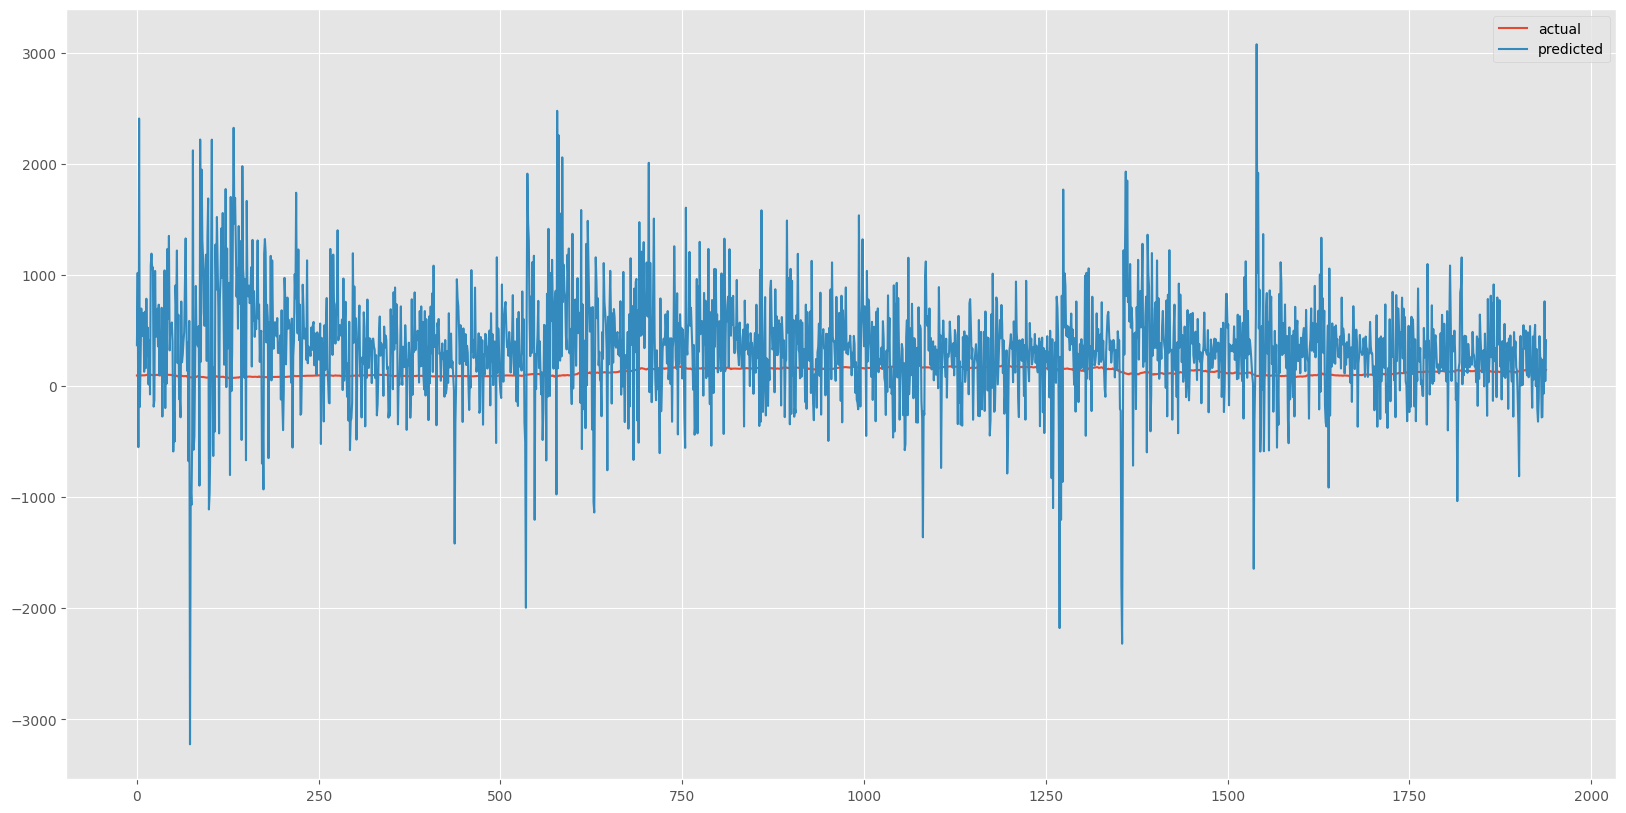

In [50]:
show_time_series_predicts(y_test, pred_y)

Use the trained model to make predictions for the test set.

In [51]:
# Write your code here. Add as many boxes as you need.
xgb_regressor = XGBRegressor(objective ='reg:linear',
    colsample_bytree = 0.3, 
    learning_rate = 0.1,
    max_depth = 5, alpha = 2, 
    n_estimators = 10)

In [52]:
xgb_regressor.fit(x_train_scaled, y_train_scaled)

D:\Fax\LAIP\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [08:21:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


XGBRegressor(alpha=2, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10, n_jobs=None,
             num_parallel_tree=None, ...)

In [53]:
xgb_regressor_predict = xgb_regressor.predict(x_test_scaled)

In [54]:
xgb_regressor_predict

array([60.5614, 60.5614, 60.5614, ..., 60.5614, 60.5614, 60.5614],
      dtype=float32)

In [55]:
# xgb_regressor_predict_scaled = y_scaler.inverse_transform(xgb_regressor_predict.reshape(-1, 1))

In [56]:
regression_report(y_test, xgb_regressor_predict)

Regression Report:
Mean Square Error: 5108.965072460513
R2 Score: -4.011948383404968


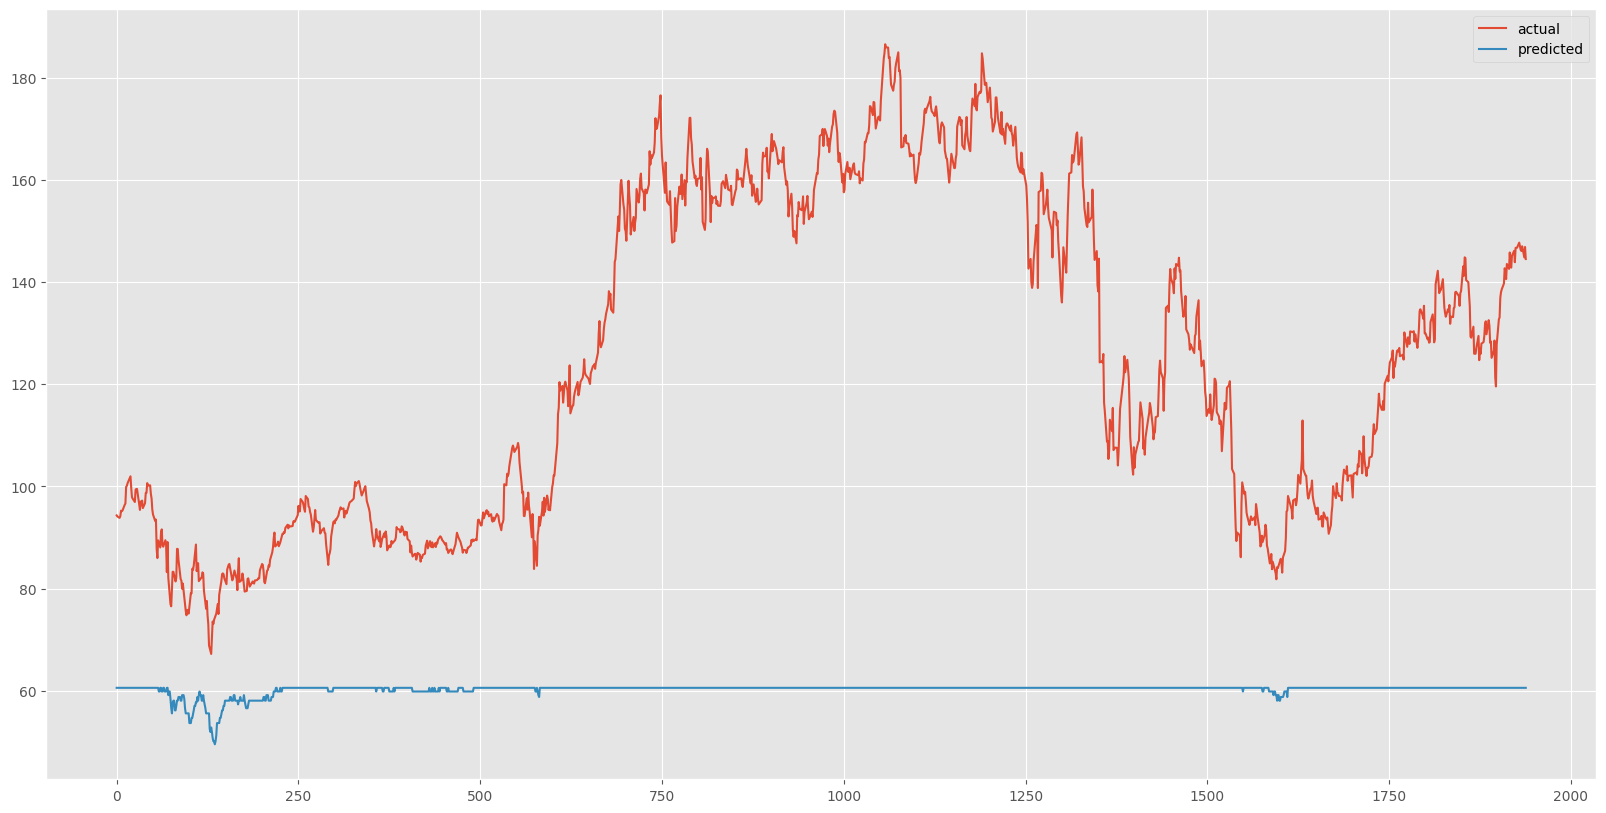

In [57]:
show_time_series_predicts(y_test, xgb_regressor_predict)

Assess the performance of the model by using different metrics provided by the `scikit-learn` library.

In [58]:
# Write your code here. Add as many boxes as you need.

### Boosting

Create an instance of an XGBoost model and train it using the `fit` function.

In [59]:
# Write your code here. Add as many boxes as you need.

Use the trained model to make predictions for the test set.

In [60]:
# Write your code here. Add as many boxes as you need.

Assess the performance of the model by using different metrics provided by the `scikit-learn` library.

In [61]:
# Write your code here. Add as many boxes as you need.